In [121]:
#This analysis is for a project listed on Kaggle. It can be found here:
#https://www.kaggle.com/c/titanic
#Essentially, this project is aimed at predicting whether passengers aboard the Titanic survived. 

#import necessary modules
import json
import os
import glob
import pandas as pd 
from pyxlsb import open_workbook
import numpy as np
#read in dataset
titanic_data=pd.read_csv("C:/Users/emccall/Downloads/titanic/train.csv")

In [122]:
#analyze column names
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [123]:
#see what the data looks like
#mix of character and numeric variables 
#there are some character variable we may have to decode
#some variables will not help out with predictions that will need to be dropped -- passengerId, Name, Ticket
#Cabin is a difficult one because the variable has both a section and a seat number
print(titanic_data.head(25))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   

                                     

In [124]:
#examine unique values of a variable
#load all of the columns into a list
column_list=titanic_data.columns.tolist()
#loop through each of the column values, and print the unique values from the column
for var_name in column_list:
    print(var_name, ":", titanic_data[var_name].unique())

PassengerId : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 

In [125]:
#Analyze variables with missing values in the dataset 
#loop through each variable, and count the rows with missing values for the variable
#Track the percent of the data where the variable is missing
#add the results to a data frame 
#Only 3 columns with missing variables - Age, Cabin, and Embarked. For age, can try to estimate the missing values as it is only missing 20% of the time
#For Cabin, since it is missing 80% of the time, it is unlikely to provide predictive value. Can code missing embarked records through dummy variables
results_frame=pd.DataFrame()

for var_name in column_list: 
    print(var_name)
    line_var={}
    line_var['name']=var_name
    empty_set=titanic_data.loc[titanic_data[var_name].isna()]
    line_var['total_empty']=len(empty_set.index)
    line_var['percent_empty']=len(empty_set.index)/len(titanic_data.index)
    results_frame = results_frame.append(line_var, ignore_index=True)

print(results_frame)
    

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked
           name  percent_empty  total_empty
0   PassengerId       0.000000          0.0
1      Survived       0.000000          0.0
2        Pclass       0.000000          0.0
3          Name       0.000000          0.0
4           Sex       0.000000          0.0
5           Age       0.198653        177.0
6         SibSp       0.000000          0.0
7         Parch       0.000000          0.0
8        Ticket       0.000000          0.0
9          Fare       0.000000          0.0
10        Cabin       0.771044        687.0
11     Embarked       0.002245          2.0


In [126]:
#Examine missing age records 
age_miss_titanic=titanic_data.loc[titanic_data['Age'].isnull()]
print(age_miss_titanic)

     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

In [127]:
#Create indicators for mr. and mrs. as a way to predict age
titanic_data['mr_ind']=titanic_data.Name.str.find("Mr.")>0
titanic_data['miss_ind']=titanic_data.Name.str.find("Miss.")>0
titanic_data['mrs_ind']=titanic_data.Name.str.find("Mrs.")>0

In [128]:
#Examine breakout of age for names with mr
#attempt to see if at a certain age, all males will have the title Mr.
#appears that at age 11 males start being referred to as Mr
titanic_males=titanic_data.loc[(titanic_data['Sex']=='male')]
titanic_males[['mr_ind','Age']].groupby(['mr_ind']).agg(['mean', 'count', 'min', 'max'])

Age                   
             mean count    min   max
mr_ind                              
False   18.848545    55   0.42  70.0
True    32.368090   398  11.00  80.0

In [129]:
#analyze passengers without Mr in title, but their age suggests they should have mr in the title
titantic_males_old=titanic_males.loc[(titanic_males['mr_ind']==False) & (titanic_males['Age']>10)]
print(titantic_males_old)

#there are several other titles that indicate an older age 
#everyone but master

     PassengerId  Survived  Pclass  \
30            31         0       1   
59            60         0       3   
125          126         1       3   
149          150         0       2   
150          151         0       2   
245          246         0       1   
249          250         0       2   
317          318         0       2   
398          399         0       2   
449          450         1       1   
536          537         0       1   
599          600         1       1   
626          627         0       2   
632          633         1       1   
647          648         1       1   
660          661         1       1   
694          695         0       1   
745          746         0       1   
802          803         1       1   
822          823         0       1   
848          849         0       2   
886          887         0       2   

                                             Name   Sex   Age  SibSp  Parch  \
30                       Uruchurtu, Don. Manue

In [130]:
#Create a variable to track the titles belonging to names
pd.options.mode.chained_assignment = None
titantic_males_old['title']=titantic_males_old.Name.str.split(',', expand=True)[1].str.split(' ', expand=True)[1]
print(titantic_males_old)


     PassengerId  Survived  Pclass  \
30            31         0       1   
59            60         0       3   
125          126         1       3   
149          150         0       2   
150          151         0       2   
245          246         0       1   
249          250         0       2   
317          318         0       2   
398          399         0       2   
449          450         1       1   
536          537         0       1   
599          600         1       1   
626          627         0       2   
632          633         1       1   
647          648         1       1   
660          661         1       1   
694          695         0       1   
745          746         0       1   
802          803         1       1   
822          823         0       1   
848          849         0       2   
886          887         0       2   

                                             Name   Sex   Age  SibSp  Parch  \
30                       Uruchurtu, Don. Manue

In [131]:
#Create a list of all titles
#jonkheer indicates nobility in Holland
male_title_list=titantic_males_old['title'].unique().tolist()
print(male_title_list)

['Don.', 'Master.', 'Rev.', 'Dr.', 'Major.', 'Sir.', 'Col.', 'Capt.', 'Jonkheer.']


In [132]:
#Edit the list to only include titles that indicate a result --- add Mr and drop Master
male_title_list.append('Mr.')
male_title_list.remove('Master.')
print(male_title_list)

#add title to entire dataset
titanic_data['title']=titanic_data.Name.str.split(',', expand=True)[1].str.split(' ', expand=True)[1] 

print(titanic_data)

['Don.', 'Rev.', 'Dr.', 'Major.', 'Sir.', 'Col.', 'Capt.', 'Jonkheer.', 'Mr.']
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0 

In [133]:
#Create an indicator for Male titles-- make sure to require that they are males
titanic_data['male_title_ind']=(titanic_data.title.isin(male_title_list)) & (titanic_data.Sex=="male")
titanic_males2=titanic_data.loc[(titanic_data['Sex']=='male')]
#examine ages with titles, note that the titles divide males into groups at 11/12
titanic_males2[['male_title_ind','Age']].groupby(['male_title_ind']).agg(['mean', 'count', 'min', 'max'])


Age                   
                     mean count    min   max
male_title_ind                              
False            4.574167    36   0.42  12.0
True            32.984412   417  11.00  80.0

In [134]:
#Now analyze females 
#analyze those with older ages but not mrs
titanic_females=titanic_data.loc[(titanic_data['Sex']!='male')]
print(titanic_females[['mrs_ind','Age']].groupby(['mrs_ind']).agg(['mean', 'count', 'min', 'max']))
#females at all ages are referred to as Miss, so miss does not tell us anything 
print(titanic_females[['miss_ind','Age']].groupby(['miss_ind']).agg(['mean', 'count', 'min', 'max']))

               Age                   
              mean count    min   max
mrs_ind                              
False    22.281046   153   0.75  63.0
True     35.898148   108  14.00  63.0
                Age                   
               mean count    min   max
miss_ind                              
False     35.713043   115  14.00  63.0
True      21.773973   146   0.75  63.0


In [135]:
#analyze passangers without Mrs in title, but their age suggests they should a title
titanic_females_old=titanic_females.loc[(titanic_females['mrs_ind']==False) & (titanic_females['Age']>13)]
print(titanic_females_old)

     PassengerId  Survived  Pclass                                  Name  \
2              3         1       3                Heikkinen, Miss. Laina   
11            12         1       1              Bonnell, Miss. Elizabeth   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
22            23         1       3           McGowan, Miss. Anna "Annie"   
38            39         0       3    Vander Planke, Miss. Augusta Maria   
..           ...       ...     ...                                   ...   
853          854         1       1             Lines, Miss. Mary Conover   
866          867         1       2          Duran y More, Miss. Asuncion   
875          876         1       3      Najib, Miss. Adele Kiamie "Jane"   
882          883         0       3          Dahlberg, Miss. Gerda Ulrika   
887          888         1       1          Graham, Miss. Margaret Edith   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
2    femal

In [136]:
#examine unique female titles for older females
#lady title indicates nobility
female_title_list=titanic_females_old['title'].unique().tolist()
print(female_title_list)
#examine the The Title - should really be Countess - but the in title is likely to indicate a title
female_the_title=titanic_females_old[titanic_females_old['title']=='the']
print(female_the_title)


['Miss.', 'Mme.', 'Ms.', 'Lady.', 'Mlle.', 'the', 'Dr.']
     PassengerId  Survived  Pclass  \
759          760         1       1   

                                                  Name     Sex   Age  SibSp  \
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   

     Parch  Ticket  Fare Cabin Embarked  mr_ind  miss_ind  mrs_ind title  \
759      0  110152  86.5   B77        S   False     False    False   the   

     male_title_ind  
759           False  


In [137]:
#Examine Mlle and mme titles
#Mlle -- French for mss - MME- french for Mrs. 
female_mille_mme_title=titanic_females_old[(titanic_females_old['title']=='Mlle.')| (titanic_females_old['title']=='Mme.')]
print(female_mille_mme_title)

     PassengerId  Survived  Pclass  \
369          370         1       1   
641          642         1       1   
710          711         1       1   

                                                 Name     Sex   Age  SibSp  \
369                     Aubart, Mme. Leontine Pauline  female  24.0      0   
641                              Sagesser, Mlle. Emma  female  24.0      0   
710  Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")  female  24.0      0   

     Parch    Ticket     Fare Cabin Embarked  mr_ind  miss_ind  mrs_ind  \
369      0  PC 17477  69.3000   B35        C   False     False    False   
641      0  PC 17477  69.3000   B35        C   False     False    False   
710      0  PC 17482  49.5042   C90        C   False     False    False   

     title  male_title_ind  
369   Mme.           False  
641  Mlle.           False  
710  Mlle.           False  


In [138]:
#Edit the list to only include titles that indicate an adult 
female_title_list.append('Mrs.')
female_title_list.remove('Miss.')
female_title_list.remove('Mlle.')

In [139]:
#create a female title indicator 
titanic_data['female_title_ind']=(titanic_data.title.isin(female_title_list)) & (titanic_data.Sex=="female")
titanic_females2=titanic_data.loc[(titanic_data['Sex']!='male')]
#examine age distribution - note that it doesn't break out females into ages -- will need to look into other factors
titanic_females2[['female_title_ind','Age']].groupby(['female_title_ind']).agg(['mean', 'count', 'min', 'max'])



Age                   
                       mean count    min   max
female_title_ind                              
False             21.804054   148   0.75  63.0
True              35.920354   113  14.00  63.0

In [140]:

titantic_data_females_miss_no_sib_par=titanic_females2.loc[(titanic_females2['female_title_ind']==False) & (titanic_females2['Parch']==0)]     
#significant number of females traveling alone at older ages  
print(titantic_data_females_miss_no_sib_par)


#Examine breakout of ages females without titles by whether they traveled with parents and siblings
#the ones with parents and siblings do appear to be younger
titantic_data_females_miss=titanic_females2.loc[(titanic_females2['female_title_ind']==False)]  
print(titantic_data_females_miss[['Parch', 'SibSp','Age']].groupby(['Parch', 'SibSp' ]).agg(['mean', 'count', 'min', 'max']))





     PassengerId  Survived  Pclass                                  Name  \
2              3         1       3                Heikkinen, Miss. Laina   
11            12         1       1              Bonnell, Miss. Elizabeth   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
22            23         1       3           McGowan, Miss. Anna "Annie"   
28            29         1       3         O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                   ...   
842          843         1       1               Serepeca, Miss. Augusta   
866          867         1       2          Duran y More, Miss. Asuncion   
875          876         1       3      Najib, Miss. Adele Kiamie "Jane"   
882          883         0       3          Dahlberg, Miss. Gerda Ulrika   
887          888         1       1          Graham, Miss. Margaret Edith   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
2    femal

In [141]:
#create a variable for Females without titles traveling alone
def female_alone(Sex, female_title_ind, Parch, SibSp):
        if (Sex!='male') & (female_title_ind==False) & (Parch + SibSp==0): 
            female_alone=True
        else:
           female_alone= False 
        return female_alone
#create a variable for Females without titles traveling with parents and siblings
def female_par_child(Sex, female_title_ind, Parch, SibSp):
        if (Sex!='male') & (female_title_ind==False) & (Parch>0) & (SibSp>0): 
            female_par_child=True
        else:
           female_par_child= False 
        return female_par_child
    
#apply functions created above to dataset
titanic_data['female_alone'] = titanic_data.apply(lambda x: female_alone(x['Sex'], x['female_title_ind'] , x['Parch'], x["SibSp"]), axis=1)

titanic_data['female_par_child'] = titanic_data.apply(lambda x: female_par_child(x['Sex'], x['female_title_ind'] , x['Parch'], x["SibSp"]), axis=1)

#examine age breakout by sex, male or female title, female alone, female with parents and siblings 
#for females, can see that the new groups do look to divide kids into different ages, though the distributions are all wide
print(titanic_data[['Sex', 'male_title_ind', 'female_title_ind', 'female_alone', 'female_par_child', 'Age']].groupby(['Sex', 'male_title_ind', 'female_title_ind', 'female_alone', 'female_par_child' ]).agg(['mean', 'median','count', 'min', 'max']))




                                                                            Age  \
                                                                           mean   
Sex    male_title_ind female_title_ind female_alone female_par_child              
female False          False            False        False             19.100000   
                                                    True              10.500000   
                                       True         False             27.650000   
                      True             False        False             35.920354   
male   False          False            False        False              4.574167   
       True           False            False        False             32.984412   

                                                                             \
                                                                     median   
Sex    male_title_ind female_title_ind female_alone female_par_child          
female False   

In [142]:
#Create a dataset that has the mean age for the variables in the group by procedure
age_est=titanic_data.groupby(['Sex', 'male_title_ind', 'female_title_ind', 'female_alone', 'female_par_child'], as_index=False)['Age'].mean()
#renaming age variable so it merges in more effectively
age_est=age_est.rename(columns={"Age": "age_est"})

print(age_est)


#merge in age information based on grouping method
titanic_data_est_age=pd.merge(titanic_data,age_est,on=['Sex', 'male_title_ind', 'female_title_ind', 'female_alone', 'female_par_child'],how='left')
print(titanic_data_est_age)

#create an age variable that is populated with age when its not missing, and populated with the estimate when it is
titanic_data_est_age['Age Use']=np.where(pd.isnull(titanic_data_est_age.Age), titanic_data_est_age.age_est, titanic_data_est_age.Age)




      Sex  male_title_ind  female_title_ind  female_alone  female_par_child  \
0  female           False             False         False             False   
1  female           False             False         False              True   
2  female           False             False          True             False   
3  female           False              True         False             False   
4    male           False             False         False             False   
5    male            True             False         False             False   

     age_est  
0  19.100000  
1  10.500000  
2  27.650000  
3  35.920354  
4   4.574167  
5  32.984412  
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'mr_ind', 'miss_ind', 'mrs_ind', 'title', 'male_title_ind', 'female_title_ind', 'female_alone', 'female_par_child', 'age_est', 'Age Use']
PassengerId


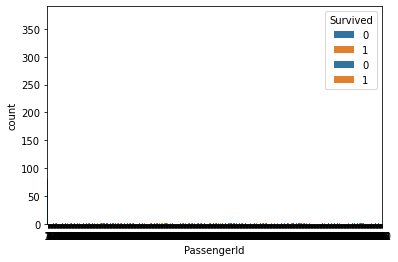

Survived
Pclass


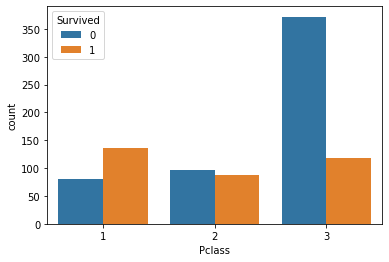

Name
Sex


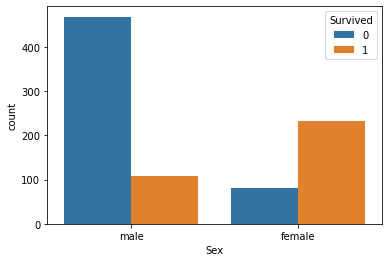

Age


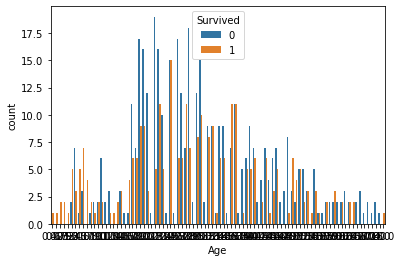

SibSp


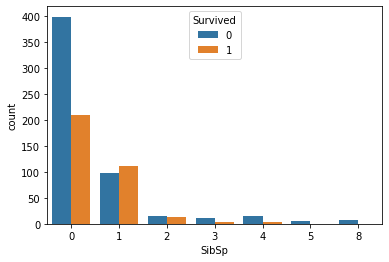

Parch


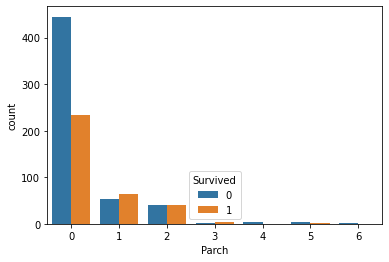

Ticket


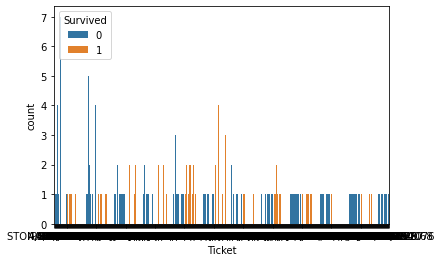

Fare


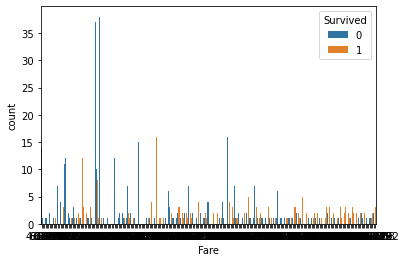

Cabin


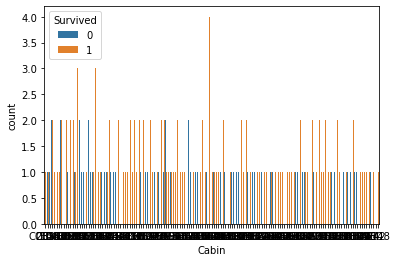

Embarked


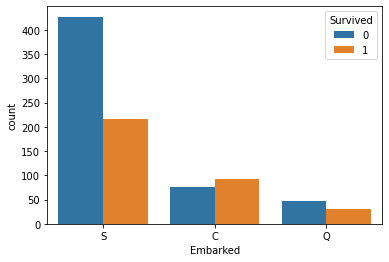

mr_ind


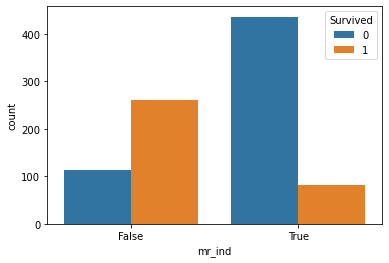

miss_ind


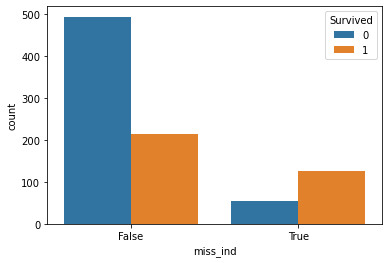

mrs_ind


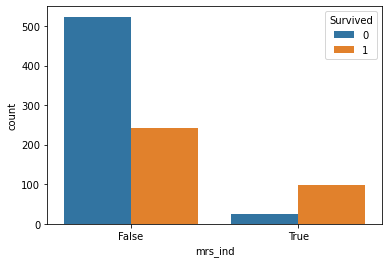

title
male_title_ind


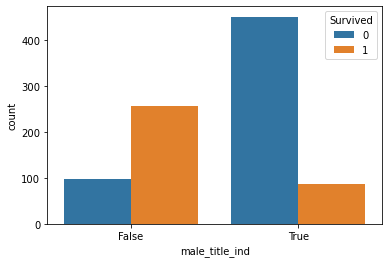

female_title_ind


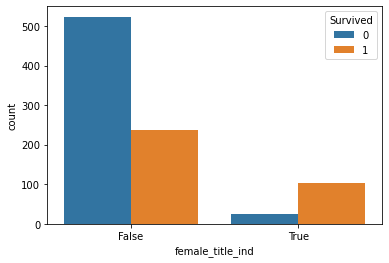

female_alone


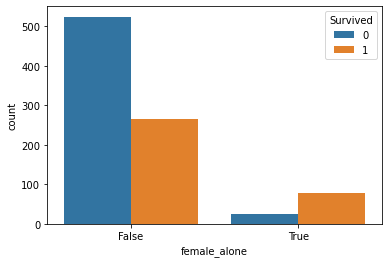

female_par_child


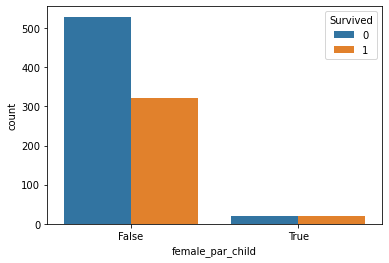

age_est


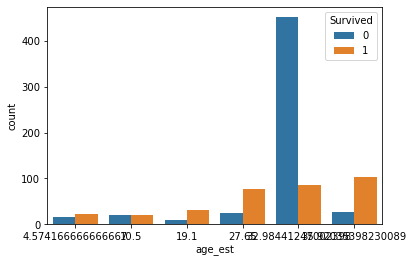

Age Use


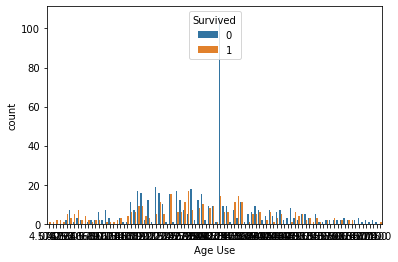

In [143]:
#examine relationships between the variables and survived
import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on two categorical variable
sns.countplot(x ='Pclass', hue = "Survived", data = titanic_data_est_age)

#create a list of all the columns in the new dataset
column_list=titanic_data_est_age.columns.tolist()
print(column_list)

#loop through each column, and plot it against the Survived variable
# do not create a plot of Survived vs Survived
#Variables with a strong relationship: Pclass, sex, SibSp, Parch, Embarked
#Fare is hard to see by higher fares seem to have higher survival rates
#Private class seems to be strongly related
for var_name in column_list:
    print(var_name)
    if var_name not in ['Survived', 'last_name', ',last_name_full', 'Name', 'title']:
        sns.countplot(x =var_name, hue = "Survived", data = titanic_data_est_age)
        plt.show()

        
        

In [144]:
#Drop variables that won't be used in the classification analysis
#Cabin is missing too often 
#Age has been replaced by a variable that is never missing
#remove variables created in estimating age
titanic_data_est_age_slm=titanic_data_est_age.drop(['Ticket','Cabin', 'Name', 'Age', 'title', 
'male_title_ind',  'female_title_ind', 'female_alone', 'female_par_child',  'mr_ind',  'miss_ind',  'mrs_ind',
'age_est'],axis=1)




In [145]:
#change class to categorical - has no numeric significance
titanic_data_est_age_slm['Pclass'] = titanic_data_est_age_slm['Pclass'].astype('category',copy=False)

In [146]:
#create dummy vars
titanic_data_dummiess=pd.get_dummies(titanic_data_est_age_slm)

In [147]:
#look at correlation matrixes 
#passenger id doesn't appear to be highly correlated
correlation_matrix = titanic_data_dummiess.corr()
survivied_matrix=correlation_matrix["Survived"]
print(survivied_matrix)

PassengerId   -0.005007
Survived       1.000000
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Age Use       -0.079447
Pclass_1       0.285904
Pclass_2       0.093349
Pclass_3      -0.322308
Sex_female     0.543351
Sex_male      -0.543351
Embarked_C     0.168240
Embarked_Q     0.003650
Embarked_S    -0.155660
Name: Survived, dtype: float64


In [148]:
#create sets used for prediction
#Drop passenger id since its correlation is low
#Also drop predictor variable
x_train=titanic_data_dummiess.drop(['PassengerId', 'Survived'],axis=1)
y_train=titanic_data_dummiess['Survived']

In [149]:
#Create Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=100)
cls.fit(x_train, y_train)



RandomForestClassifier()

In [150]:
#Evaluate accuracy of model, appears very accurate
from sklearn import metrics
y_pred=cls.predict(x_train)
print(metrics.accuracy_score(y_train, y_pred))


0.9820426487093153


In [151]:
#Test Logistic Regression Model 
#is not nearly as accurate, will use Random forest classifier model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)
y_pred_log_reg=logreg.predict(x_train)
print(metrics.accuracy_score(y_train, y_pred_log_reg))


0.8047138047138047


In [152]:
#Apply process to Test data
titanic_data_test=pd.read_csv("C:/Users/emccall/Downloads/titanic/test.csv")
#examine titles in training dataset
#add Dona to title list, wasn't in previous list and refers to Mrs in Spanish
titanic_data_test['title']=titanic_data_test.Name.str.split(',', expand=True)[1].str.split(' ', expand=True)[1] 
titanic_data['title']=titanic_data.Name.str.split(',', expand=True)[1].str.split(' ', expand=True)[1]

test_title_list=titanic_data_test['title'].unique().tolist()


train_title_list=titanic_data['title'].unique().tolist()


new_title_list=[]

for title in test_title_list: 
    if title not in train_title_list: 
        print(title)
        new_title_list.append(title)


print(new_title_list)
female_title_list.append('Dona.')






Dona.
['Dona.']


In [153]:
#Create male and female title indicators
titanic_data_test['male_title_ind']=(titanic_data_test.title.isin(male_title_list)) & (titanic_data_test.Sex=="male")

titanic_data_test['female_title_ind']=(titanic_data_test.title.isin(female_title_list)) & (titanic_data_test.Sex=="female")


#add female alone and female with parents and siblings variables
def female_alone(Sex, female_title_ind, Parch, SibSp):
        if (Sex!='male') & (female_title_ind==False) & (Parch + SibSp==0): 
            female_alone=True
        else:
           female_alone= False 
        return female_alone

def female_par_child(Sex, female_title_ind, Parch, SibSp):
        if (Sex!='male') & (female_title_ind==False) & (Parch>0) & (SibSp>0): 
            female_par_child=True
        else:
           female_par_child= False 
        return female_par_child
    

titanic_data_test['female_alone'] = titanic_data_test.apply(lambda x: female_alone(x['Sex'], x['female_title_ind'] , x['Parch'], x["SibSp"]), axis=1)

titanic_data_test['female_par_child'] = titanic_data_test.apply(lambda x: female_par_child(x['Sex'], x['female_title_ind'] , x['Parch'], x["SibSp"]), axis=1)
#examine average ages, for grouping in test data, appears similar to training data
print(titanic_data_test[['Sex', 'male_title_ind', 'female_title_ind', 'female_alone', 'female_par_child', 'Age']].groupby(['Sex', 'male_title_ind', 'female_title_ind', 'female_alone', 'female_par_child' ]).agg(['mean', 'median','count', 'min', 'max']))

#add estimated age variable
titanic_data_test_est_age=pd.merge(titanic_data_test,age_est,on=['Sex', 'male_title_ind', 'female_title_ind', 'female_alone', 'female_par_child'],how='left')
print(titanic_data_test_est_age)

titanic_data_test_est_age['Age Use']=np.where(pd.isnull(titanic_data_test_est_age.Age), titanic_data_test_est_age.age_est, titanic_data_test_est_age.Age)

#Drop variables not used in the model, and convert private class to categorical
titanic_data_test_est_age_slm=titanic_data_test_est_age.drop(['Ticket','Cabin', 'Name', 'Age', 'title', 
'male_title_ind',  'female_title_ind', 'female_alone', 'female_par_child', 
'age_est'],axis=1)


titanic_data_test_est_age_slm['Pclass'] = titanic_data_test_est_age_slm['Pclass'].astype('category',copy=False)

                                                                            Age  \
                                                                           mean   
Sex    male_title_ind female_title_ind female_alone female_par_child              
female False          False            False        False             21.777778   
                                                    True              11.005625   
                                       True         False             26.192308   
                      True             False        False             38.904762   
male   False          False            False        False              7.406471   
       True           False            False        False             32.340426   

                                                                             \
                                                                     median   
Sex    male_title_ind female_title_ind female_alone female_par_child          
female False   

In [154]:
#look for missing variables
#fare is sometimes missing
#print missing records
#only 1 missing fare record
titanic_data_test_est_age_no_na=titanic_data_test_est_age_slm.dropna()
only_na = titanic_data_test_est_age_slm[~titanic_data_test_est_age_slm.index.isin(titanic_data_test_est_age_no_na.index)]

print(only_na)

#examine distribution of fare, seems reasonable to fill in using mean value
#use the training data to fill in missing values
print(titanic_males[['Fare']].agg(['mean', 'median', 'min', 'max']))

titanic_data_test_est_age_slm['Fare']=titanic_data_test_est_age_slm['Fare'].fillna(value=titanic_data['Fare'].mean())







     PassengerId Pclass   Sex  SibSp  Parch  Fare Embarked  Age Use
152         1044      3  male      0      0   NaN        S     60.5
              Fare
mean     25.523893
median   10.500000
min       0.000000
max     512.329200


In [155]:
#add dummy variables and drop passenger id variable
titanic_data_test_dummiess=pd.get_dummies(titanic_data_test_est_age_slm)

titanic_data_test_dummiess_slm=titanic_data_test_dummiess.drop(['PassengerId' ],axis=1)

x_test=titanic_data_test_dummiess.drop(['PassengerId'],axis=1)



In [156]:
#Predict survived
titanic_data_test_dummiess['Survived']=cls.predict(x_test)

In [157]:
print(titanic_data_test_dummiess)

     PassengerId  SibSp  Parch      Fare    Age Use  Pclass_1  Pclass_2  \
0            892      0      0    7.8292  34.500000         0         0   
1            893      1      0    7.0000  47.000000         0         0   
2            894      0      0    9.6875  62.000000         0         1   
3            895      0      0    8.6625  27.000000         0         0   
4            896      1      1   12.2875  22.000000         0         0   
..           ...    ...    ...       ...        ...       ...       ...   
413         1305      0      0    8.0500  32.984412         0         0   
414         1306      0      0  108.9000  39.000000         1         0   
415         1307      0      0    7.2500  38.500000         0         0   
416         1308      0      0    8.0500  32.984412         0         0   
417         1309      1      1   22.3583   4.574167         0         0   

     Pclass_3  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
0           1           

In [158]:
#Create a dataset for submission
titanic_submission=titanic_data_test_dummiess[['PassengerId', 'Survived']]
print(titanic_submission)
titanic_submission.to_csv("C:/Users/emccall/Downloads/titanic/Titanic_Kaggle_Submission_Ethan_McCall.csv")


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
